In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Dataset/Categorical_Data.csv")

In [5]:
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
140,459415,Male,No,30,No,Doctor,0.0,Low,4.0,Cat_6
1790,465101,Female,Yes,81,Yes,Lawyer,1.0,Low,1.0,Cat_6
2113,466210,Female,Yes,58,Yes,Artist,1.0,High,4.0,Cat_6
1479,463981,Female,No,30,Yes,Artist,5.0,Low,1.0,NaN
1127,462755,Female,No,18,No,Healthcare,1.0,Low,NaN,Cat_6


In [7]:
df = df.drop(columns=["ID","Family_Size","Age","Work_Experience"])

In [9]:
df.sample(5)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
1313,Male,No,No,Marketing,Low,Cat_6
1467,Female,No,No,Artist,Low,Cat_4
1257,Female,Yes,Yes,Artist,Low,Cat_6
2119,Female,Yes,Yes,Artist,Average,Cat_6
1962,Female,Yes,No,Entertainment,Average,Cat_4


In [11]:
df.isnull().mean()*100

Gender            0.000000
Ever_Married      1.903312
Graduated         0.913590
Profession        1.446517
Spending_Score    0.000000
Var_1             1.218120
dtype: float64

In [13]:
df.nunique()

Gender            2
Ever_Married      2
Graduated         2
Profession        9
Spending_Score    3
Var_1             7
dtype: int64

<Axes: xlabel='Profession'>

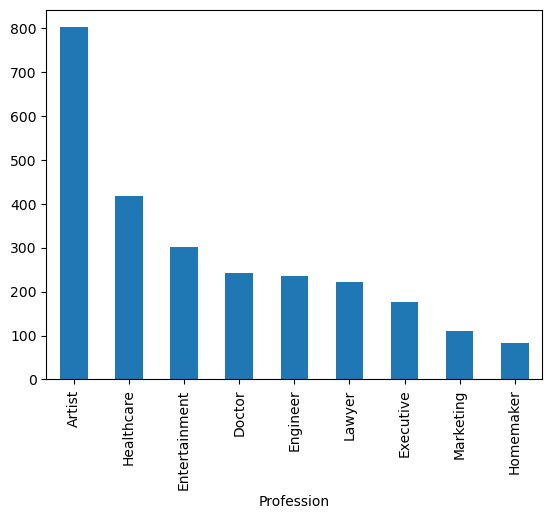

In [15]:
df["Profession"].value_counts().plot.bar()

<Axes: xlabel='Gender'>

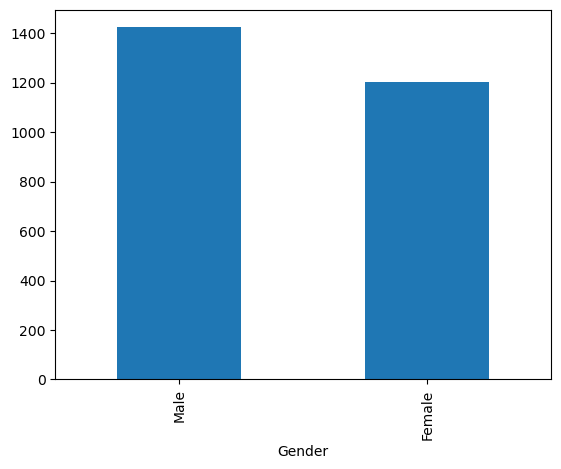

In [16]:
df["Gender"].value_counts().plot.bar()

In [19]:
df['Profession'].mode()

0    Artist
Name: Profession, dtype: object

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [34]:
X = df.drop(columns=['Spending_Score'])
y = df['Spending_Score']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2, random_state = 42)

In [74]:
si = SimpleImputer(strategy = "most_frequent")

In [78]:
df[['Profession']] = si.fit_transform(df[['Profession']])

In [80]:
df.isnull().mean()*100

Gender            0.000000
Ever_Married      1.903312
Graduated         0.913590
Profession        0.000000
Spending_Score    0.000000
Var_1             1.218120
dtype: float64

<Axes: xlabel='Profession'>

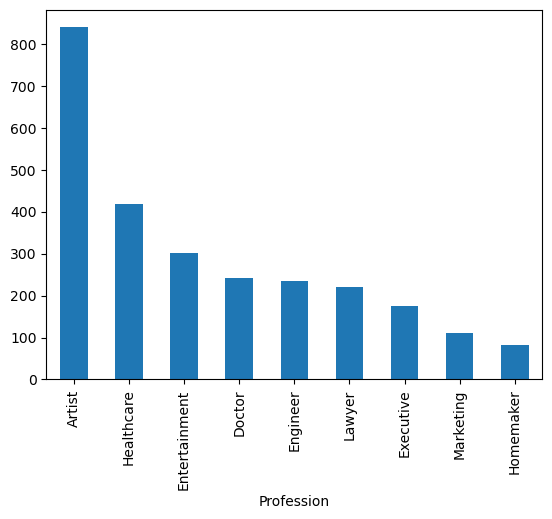

In [82]:
df['Profession'].value_counts().plot.bar()